In [1]:
# Import Libraries and packages to use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [9]:
# Read in the data

df = pd.read_csv('/Users/tony/Downloads/movies.csv')

In [55]:
# Look at data

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [11]:
# Check to see if there is missing data
# Loop through data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [12]:
# Data types for colums

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

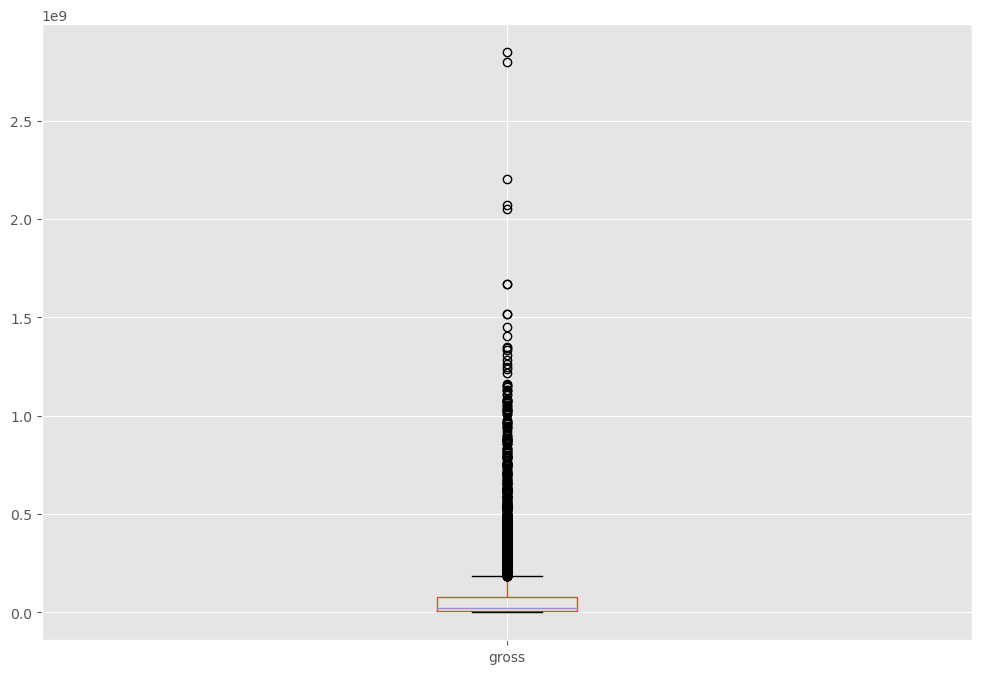

In [13]:
# Are there any outliers

df.boxplot(column=['gross'])

In [56]:
# Drop any duplicates

df.drop_duplicates()

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [57]:
# Order data a little to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [21]:
# Able to navigate throught data easy

pd.set_option('display.max_rows', None)

<AxesSubplot:xlabel='gross', ylabel='budget'>

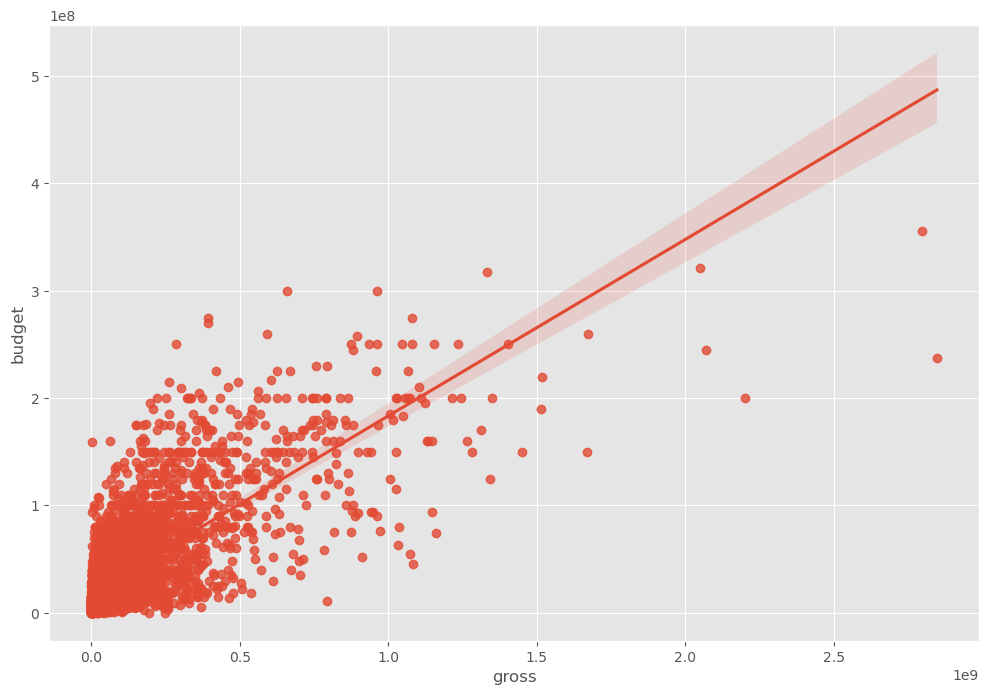

In [20]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

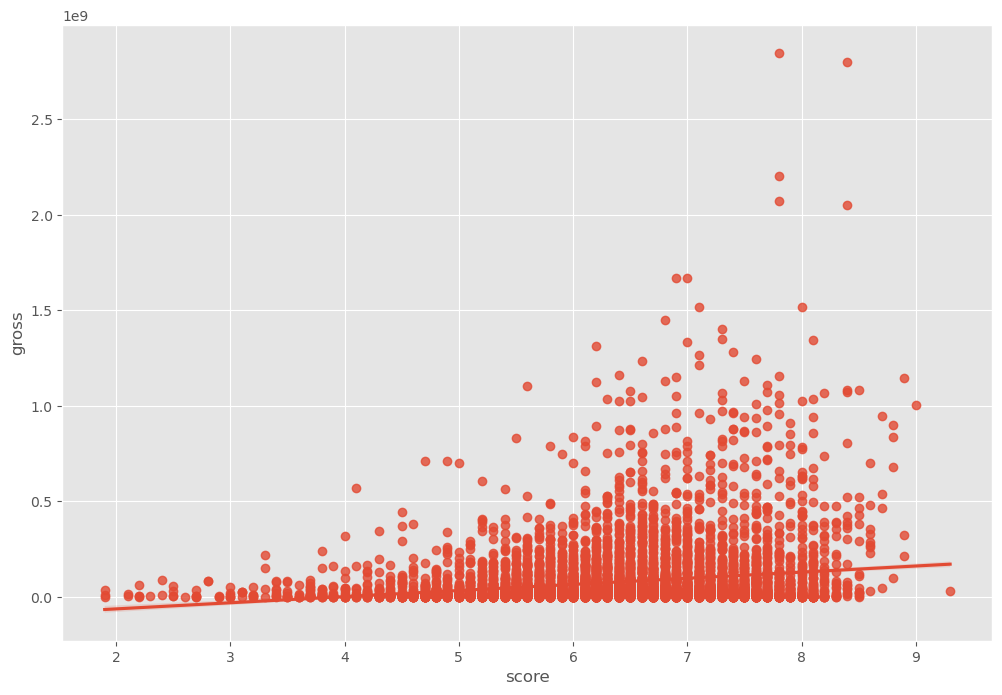

In [22]:
sns.regplot(x="score", y="gross", data=df)

In [23]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [24]:
df.corr(method ='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000

In [25]:
df.corr(method ='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000

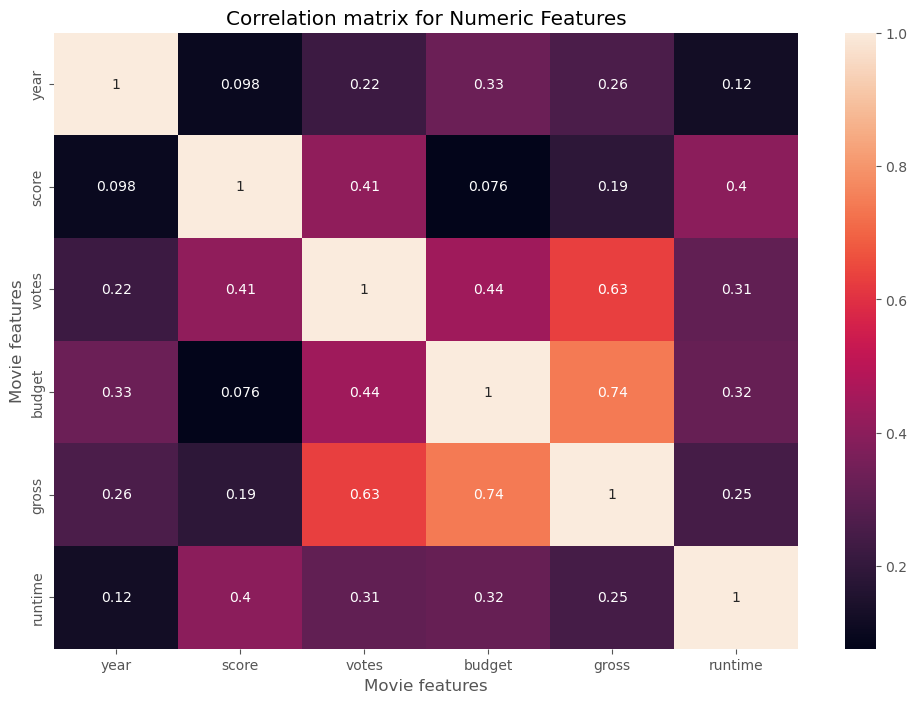

In [26]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
# Using factorize - assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.143938  0.036367  0.965761  0.959015 -0.046733   
rating    0.143938  1.000000 -0.086723  0.156713  0.146606  0.012595   
genre     0.036367 -0.086723  1.000000  0.037184  0.035940 -0.002437   
year      0.965761  0.156713  0.037184  1.000000  0.993190 -0.044981   
released  0.959015  0.146606  0.035940  0.993190  1.000000 -0.045761   
score    -0.046733  0.012595 -0.002437 -0.044981 -0.045761  1.000000   
votes     0.287776  0.099972  0.023285  0.312401  0.299905 -0.009749   
director  0.745905  0.085520  0.047288  0.770497  0.770876 -0.022687   
writer    0.805211  0.103623  0.033688  0.824770  0.819617 -0.034685   
star      0.731565  0.093116  0.038649  0.756400  0.754468 -0.009896   
country   0.142828  0.000494 -0.015795  0.140216  0.148468  0.023097   
budget    0.277488  0.193353  0.073008  0.300621  0.285691 -0.012642   
gross     0.947324  0.158582  0.038616  0.980873  0.976423 -0.047041   
company   0.591667 -0.028035  0.009566  0.601571  0.607954 -0.028432   
runtime   0.048955  0.032741  0.001462  0.050647  0.048235  0.026436   

             votes  director    writer      star   country    budget  \
name      0.287776  0.745905  0.805211  0.731565  0.142828  0.277488   
rating    0.099972  0.085520  0.103623  0.093116  0.000494  0.193353   
genre     0.023285  0.047288  0.033688  0.038649 -0.015795  0.073008   
year      0.312401  0.770497  0.824770  0.756400  0.140216  0.300621   
released  0.299905  0.770876  0.819617  0.754468  0.148468  0.285691   
score    -0.009749 -0.022687 -0.034685 -0.009896  0.023097 -0.012642   
votes     1.000000  0.192220  0.224122  0.179601 -0.045914  0.398519   
director  0.192220  1.000000  0.748340  0.682385  0.155471  0.106617   
writer    0.224122  0.748340  1.000000  0.675685  0.157202  0.187238   
star      0.179601  0.682385  0.675685  1.000000  0.182045  0.107991   
country  -0.045914  0.155471  0.157202  0.182045  1.000000 -0.082082   
budget    0.398519  0.106617  0.187238  0.107991 -0.082082  1.000000   
gross     0.286180  0.750911  0.805576  0.735680  0.133982  0.285832   
company   0.008900  0.552258  0.546151  0.527116  0.226346 -0.092249   
runtime   0.106024 -0.011070  0.032264  0.035392  0.124154  0.112097   

             gross   company   runtime  
name      0.947324  0.591667  0.048955  
rating    0.158582 -0.028035  0.032741  
genre     0.038616  0.009566  0.001462  
year      0.980873  0.601571  0.050647  
released  0.976423  0.607954  0.048235  
score    -0.047041 -0.028432  0.026436  
votes     0.286180  0.008900  0.106024  
director  0.750911  0.552258 -0.011070  
writer    0.805576  0.546151  0.032264  
star      0.735680  0.527116  0.035392  
country   0.133982  0.226346  0.124154  
budget    0.285832 -0.092249  0.112097  
gross     1.000000  0.588156  0.042978  
company   0.588156  1.000000  0.005137  
runtime   0.042978  0.005137  1.000000

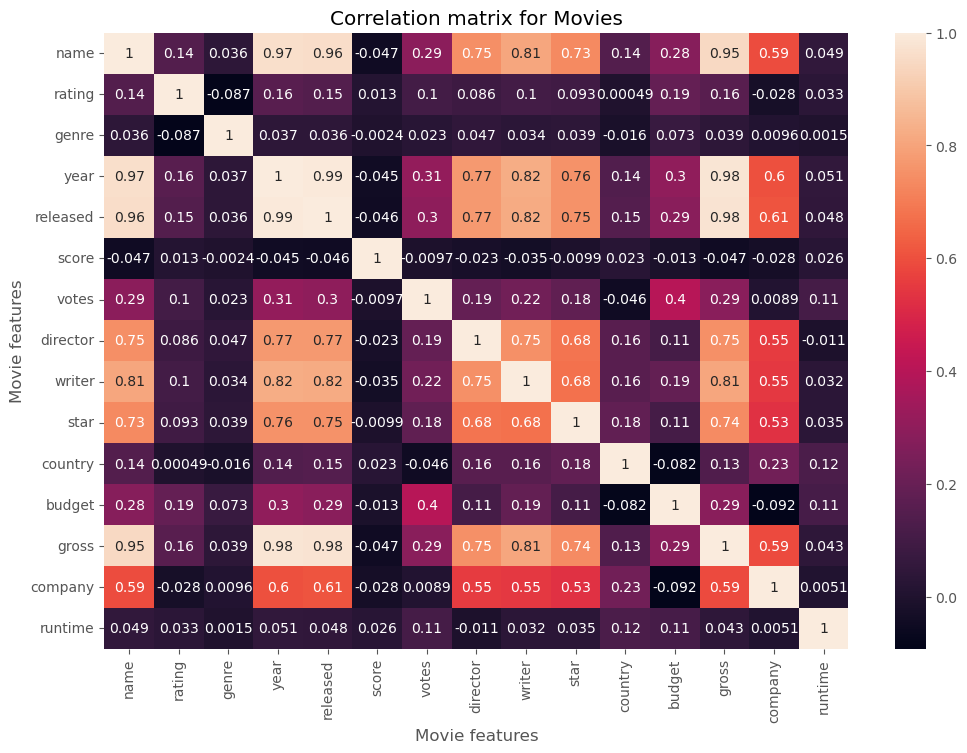

In [28]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [58]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

df.head()

name      name        1.000000
          rating      0.154269
          genre       0.036367
          year        0.965761
          released    0.959855
          score      -0.046733
          votes       0.287776
          director    0.745905
          writer      0.805801
          star        0.731509
          country     0.144960
          budget      0.277488
          gross       0.947324
          company     0.591834
          runtime     0.048955
          Year        0.959855
rating    name        0.154269
          rating      1.000000
          genre      -0.091898
          year        0.166475
          released    0.156544
          score       0.012393
          votes       0.104436
          director    0.098462
          writer      0.115812
          star        0.107458
          country     0.020296
          budget      0.185162
          gross       0.161506
          company    -0.011014
          runtime     0.037179
          Year        0.156544
genre   

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [30]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    company    -0.092249
company   budget     -0.092249
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.082082
country   budget     -0.082082
gross     score      -0.047041
score     gross      -0.047041
          name       -0.046733
name      score      -0.046733
votes     country    -0.045914
country   votes      -0.045914
released  score      -0.045761
score     released   -0.045761
year      score      -0.044981
score     year       -0.044981
writer    score      -0.034685
score     writer     -0.034685
company   score      -0.028432
score     company    -0.028432
company   rating     -0.028035
rating    company    -0.028035
director  score      -0.022687
score     director   -0.022687
genre     country    -0.015795
country   genre      -0.015795
score     budget     -0.012642
budget    score      -0.012642
runtime   director   -0.011070
director  runtime    -0.011070
score     star       -0.009896
star      score      -0.009896
score   

In [32]:
#take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.607954
company   released    0.607954
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
gross     star        0.735680
star      gross       0.735680
director  name        0.745905
name      director    0.745905
writer    director    0.748340
director  writer      0.748340
gross     director    0.750911
director  gross       0.750911
released  star        0.754468
star      released    0.754468
year      star        0.756400
star      year        0.756400
year    

In [33]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [53]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [59]:
df.groupby(['company', 'year'])[["gross"]].sum()

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0  1705  
1   327       55   4500000.0   58853106.0      731    104.0  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0  1492  
4   410       55   6000000.0   39846344.0     1777     98.0  1543

In [36]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [37]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

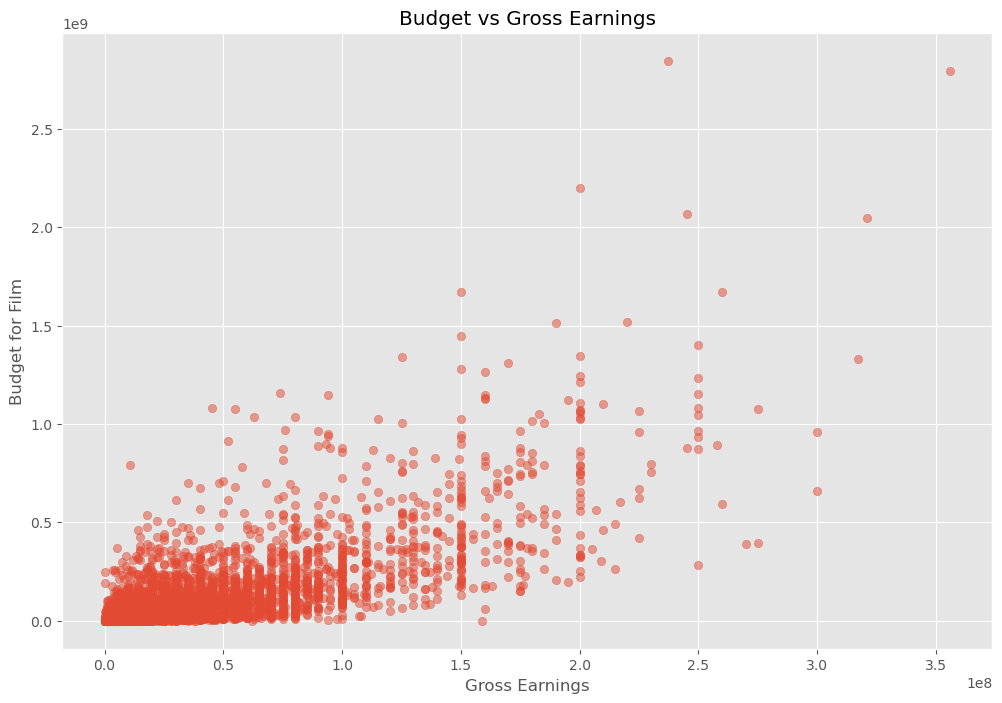

In [38]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [39]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

In [40]:
df_numerized.corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
Year     -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
Year      0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.015682   

             gross   company   runtime      Year  
name      0.005533  0.009211  0.010392 -0.011725  
rating   -0.107339 -0.032943  0.062145  0.013475  
genre    -0.235650 -0.071067 -0.052711  0.028397  
year      0.257486 -0.010431  0.120811 -0.001562  
released  0.001659 -0.010474  0.000868  0.993694  
score     0.186258  0.001030  0.399451  0.040993  
votes     0.630757  0.133204  0.309212  0.017337  
director -0.014441  0.004404  0.017624 -0.000105  
writer   -0.023519  0.005646 -0.003511 -0.002892  
star     -0.002717  0.012442  0.010174  0.015406  
country   0.092129  0.095548 -0.078412 -0.022277  
budget    0.740395  0.173214  0.320447  0.015682  
gross     1.000000  0.154840  0.245216  0.002946  
company   0.154840  1.000000  0.034402 -0.010726  
runtime   0.245216  0.034402  1.000000  0.000410  
Year      0.002946 -0.010726  0.000410  1.000000

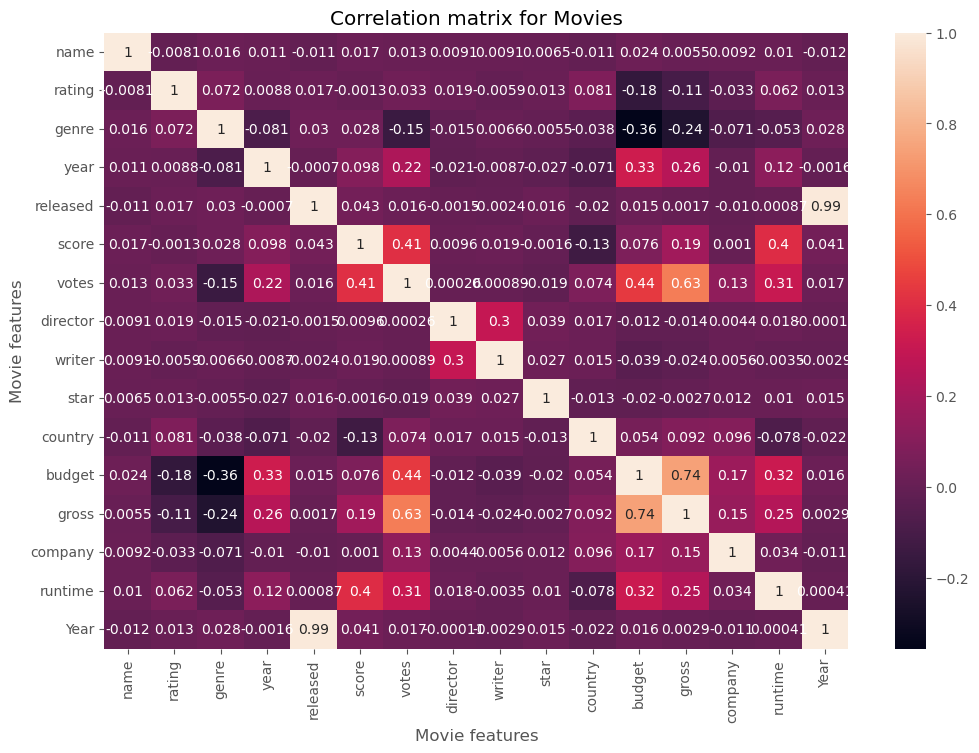

In [41]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

/Users/tony/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/seabor

<AxesSubplot:xlabel='rating', ylabel='gross'>

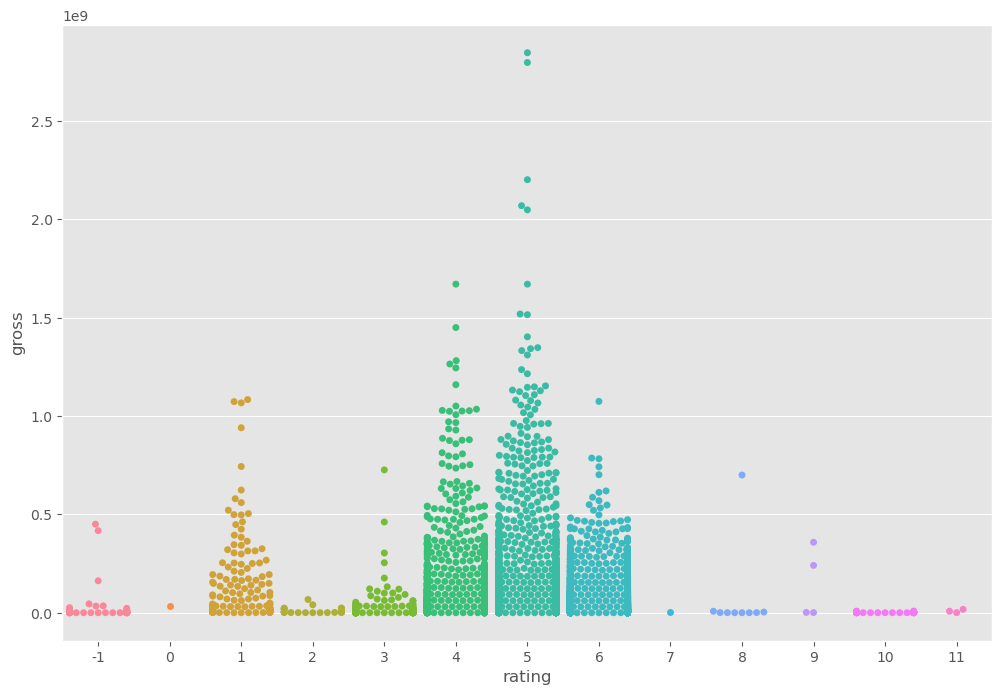

In [48]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

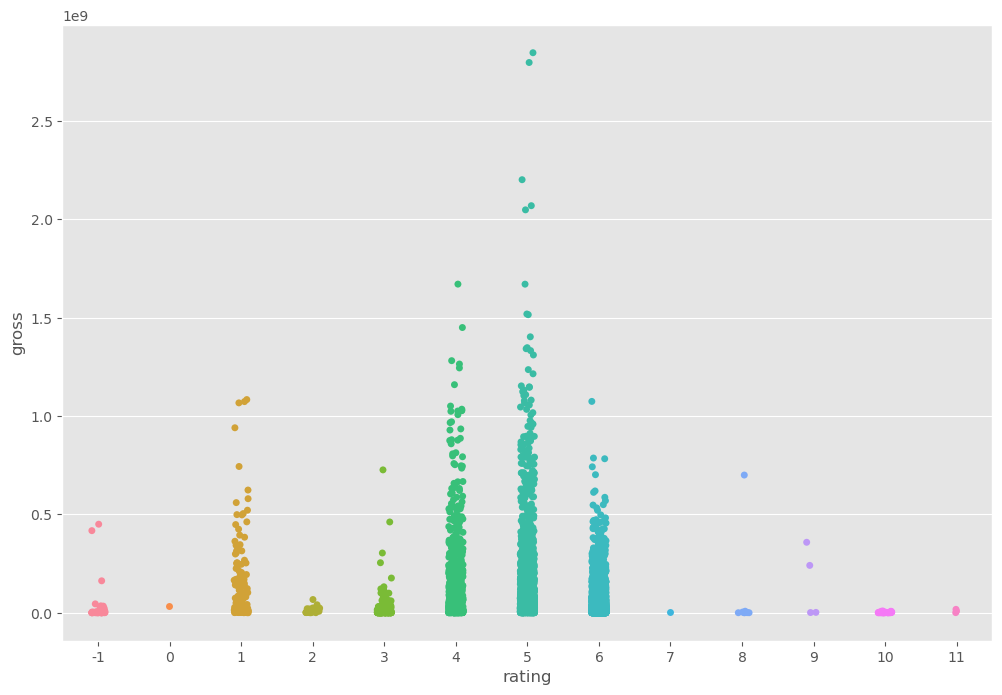

In [51]:
sns.stripplot(x="rating", y="gross", data=df)